In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)
len(x_test)

360

Using different model to measure performance of models

In [82]:
from sklearn.metrics import mean_absolute_error

In [83]:
# first use logistic regression

lr = LogisticRegression()
lr.fit(x_train, y_train)


C:\Users\Asim Ramzan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
y_pred = lr.predict(x_test)

In [86]:
mean_absolute_error(y_test, y_pred)
# error is .3873

0.38731218697829717

In [87]:
lr.score(x_test, y_test)

0.9148580968280468

lets try svm

In [9]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [10]:
svm.score(x_test, y_test)

0.9888888888888889

Random forest

In [13]:
rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [14]:
rfc.score(x_test, y_test)

0.9805555555555555

### all these models change it we execute it repetitively

In [16]:
# lets import k fold packages
from sklearn.model_selection import KFold

In [46]:
kf = KFold(n_splits = 3) #only 3 folds
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [20]:
# Lets create different folds for data train like first it takes 3 nums from start then from mid and then from last
# if we have 3 folds like above i mentioned

# so for that split i have to give total nums of which split has to happen by loops
for train_index, test_index in kf.split([1, 2, 3,4 ,5 , 6, 7, 8, 9]):
    print(train_index, test_index)

    
# Here is the selection of 3 folds
# [3 4 5 6 7 8] [0 1 2]
# [0 1 2 6 7 8] [3 4 5]
# [0 1 2 3 4 5] [6 7 8]

# we can use more than 3 folds


[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [47]:
# Lets make score method to test our data by different models
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [48]:
# Now by this method we can check any type of model score
# like LogisticRegression or svm ....
get_score(LogisticRegression(), x_train, x_test, y_train, y_test)

C:\Users\Asim Ramzan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9148580968280468

In [23]:
get_score(SVC(), x_train, x_test, y_train, y_test)

0.9888888888888889

In [24]:
get_score(RandomForestClassifier(), x_train, x_test, y_train, y_test)

0.9694444444444444

### Using K fold on Digits datasets


In [50]:
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold is like kfold but it will classify each of fold category in uniform way
folds = StratifiedKFold(n_splits= 2)

In [51]:
# lets make array of models
score_lr = []
score_svm = []
score_rf = []

for train_index, test_index in kf.split(digits.data):
    x_train, x_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]    

# this loop will play 3 times and it will store values of x_train, x_test, y_train, y_test and then append its values
# in above array 
# lets call get_score method
    print(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    print(get_score(SVC(), x_train, x_test, y_train, y_test))
    print(get_score(RandomForestClassifier(), x_train, x_test, y_train, y_test))  

C:\Users\Asim Ramzan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9232053422370617
0.9666110183639399
0.9432387312186978
0.9415692821368948


C:\Users\Asim Ramzan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9816360601001669
0.9565943238731218
0.9148580968280468


C:\Users\Asim Ramzan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9549248747913188
0.9248747913188647


In [52]:
# appending data with arrays
for train_index, test_index in kf.split(digits.data):
    x_train, x_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]    

# this loop will play 3 times and it will store values of x_train, x_test, y_train, y_test and then append its values
# in above array 
# lets call get_score method

    score_lr.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    score_svm.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    score_rf.append(get_score(RandomForestClassifier(n_estimators = 50), x_train, x_test, y_train, y_test))  

C:\Users\Asim Ramzan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asim Ramzan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [53]:
score_lr

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [54]:
score_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [55]:
score_rf

[0.9332220367278798, 0.9465776293823038, 0.9282136894824707]

### we can do all this stuff by sklearn library cross_val_score

In [60]:
from sklearn.model_selection import cross_val_score
# cross_val_score(RandomForestClassifier(), digits.data, digits.target)
cross_val_score(LogisticRegression(), digits.data, digits.target)
# this works as the loop in prev cell

C:\Users\Asim Ramzan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asim Ramzan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [61]:
cross_val_score(SVC(), digits.data, digits.target)


array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [67]:
cross_val_score(RandomForestClassifier(n_estimators = 40), digits.data, digits.target)
# n_estimators is no of trees in RandomForestClassifier


array([0.93888889, 0.89722222, 0.95543175, 0.95543175, 0.9275766 ])

## Excercise

In [ ]:
# Iris data set for multiple model score comparisons

In [71]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [72]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [73]:
cross_val_score(LogisticRegression(), iris.data, iris.target)


C:\Users\Asim Ramzan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [76]:
cross_val_score(SVC(), iris.data, iris.target)


array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [91]:
# cross_val_score(RandomForestClassifier(n_estimators = 40), iris.data, iris.target, cv = 3) # cv = 5 no of times cross validation

# we can check mean of these validation

cross_val_score(RandomForestClassifier(n_estimators = 40), iris.data, iris.target, cv = 5).mean() 


0.9533333333333334

In [96]:
line_score = cross_val_score(RandomForestClassifier(n_estimators = 40), iris.data, iris.target, cv = 5, scoring= 'neg_mean_absolute_error') # cv = 5 no of times cross validation
line_score_n = -line_score
line_score_n
line_score

array([-0.03333333, -0.03333333, -0.1       , -0.03333333, -0.        ])

In [95]:
np.mean(line_score_n)

0.053333333333333344

In [97]:
np.mean(cross_val_score(RandomForestClassifier(n_estimators = 40), iris.data, iris.target, cv = 5,))

0.96

# YOUTUBE Tutorial

### using RidgeCV

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV
from matplotlib import pyplot as plt
import pandas as pd


In [102]:
# loading boston dataset
boston = load_boston()

In [109]:
boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
dir(boston)
print(boston_features)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [115]:
x = boston_features['RM'].values.reshape(-1, 1)
y = boston.target
# print(x)
# print(y)

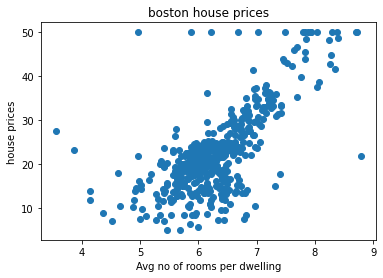

In [117]:
plt.scatter(x,y)
plt.title('boston house prices')
plt.xlabel("Avg no of rooms per dwelling")
plt.ylabel("house prices")
plt.show()

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# random state =0 means after every run its prediction score or values won't change


In [146]:
# setting the folds values
folds = [1e6]
regressor = RidgeCV(folds, store_cv_values = True)
# traing cv model
regressor.fit(x_train, y_train)

cv_mse = np.mean(regressor.cv_values_, axis = 0)


In [142]:
print(folds)
print(cv_mse)

[1000.0, 1000000.0]
[73.00797598 85.55049598]


In [143]:
print(regressor.alpha_)

1000.0


In [147]:
y_pred = regressor.predict(x_test)

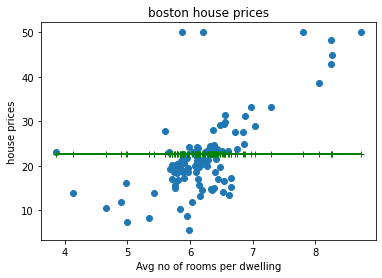

In [148]:
# plotting model values
plt.scatter(x_test,y_test)
plt.title('boston house prices')
plt.xlabel("Avg no of rooms per dwelling")
plt.ylabel("house prices")
plt.plot(x_test, y_pred, color = "g", marker = "+")
plt.show()


# testing it with different values of folds